# Handling Outliers

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

### Sensitiveness to :
    Linear Regression
    Logistic Regression
    KMeans Clustering
    Hierachieal Clustering
    PCA
    NN

### NotSensitive and Not affeted to:
    Naive Bayes Classifier
    SVM
    Decision Tree
    Ensembled Techniques
    KNN

In [2]:
data = pd.read_csv("F:/Files/Titanic.csv")

In [3]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


from this we take Age and Fare column to work on

In [4]:
data = data[['Age', 'Fare']]

In [5]:
data

,Age,Fare
0,22.0,7.2500
1,38.0,71.2833
2,26.0,7.9250
3,35.0,53.1000
4,35.0,8.0500
...,...,...
886,27.0,13.0000
887,19.0,30.0000
888,NaN,23.4500
889,26.0,30.0000


In [10]:
df = data.copy()

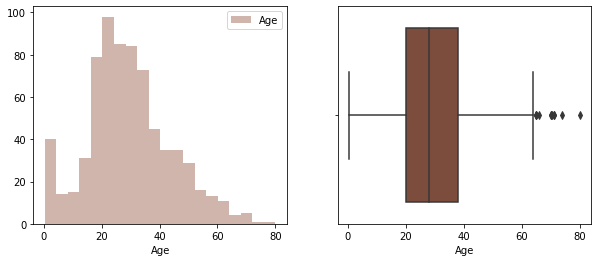

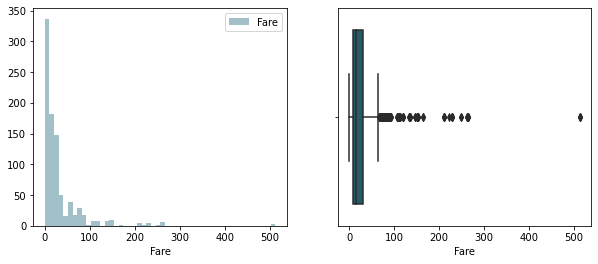

In [19]:
for i in df.columns:
    plt.figure(figsize = (10,4))
    val = np.random.randint(100000,999999)
    col = "#" + str(val)
    plt.subplot(1,2,1)
    sns.distplot(df[i], kde = False, color = col, label = i)
    plt.legend()
    plt.subplot(1,2,2)
    sns.boxplot(df[i], color = col)

    plt.show()

From this plot, we conclude that Age and Fare have an outlier's at the right end of the distribution

# Gaussian Distribution to find the outliers

In [37]:
def ran(df, var):
    upper = df[var].mean() + (3 * df[var].std())
    lower = df[var].mean() - (3 * df[var].std())
    mean = df[var].mean()
    return (upper,lower,mean)

In [38]:
Age_lst = ran(df,'Age')

In [40]:
Age_lst

(73.27860964406095, -13.88037434994331, 29.69911764705882)

In [41]:
Fare_lst = ran(df,"Fare")

In [42]:
Fare_lst

(181.2844937601173, -116.87607782296811, 32.2042079685746)

In [43]:
df['Age'] = np.where(df['Age']>73, 73, df['Age'])

In [47]:
df.loc[df['Fare'] > 181 , 'Fare'] = 181

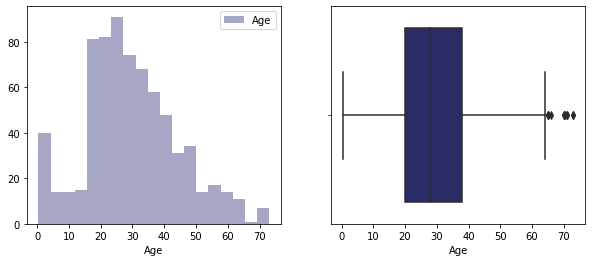

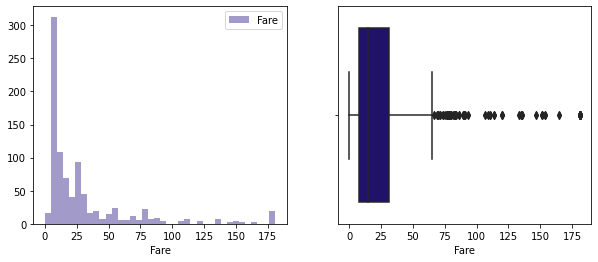

In [50]:
for i in df.columns:
    plt.figure(figsize = (10,4))
    val = np.random.randint(100000,999999)
    col = "#" + str(val)
    plt.subplot(1,2,1)
    sns.distplot(df[i], kde = False, color = col, label = i)
    plt.legend()
    plt.subplot(1,2,2)
    sns.boxplot(df[i], color = col)

    plt.show()

In [52]:
# Still Fare Having more outliers because of it doesnt following normal distribution.
# for that we use IQR

In [53]:
Q1, Q3 = np.percentile(df['Fare'], [25,72])

In [54]:
Q1

7.9104

In [55]:
Q3

28.94249999999999

In [56]:
IQR = Q3 - Q1

In [63]:
Upper = Q3 + (3 * IQR) #Extreme Bound is selected because of It doesnt follow normal distribution
Lower = Q1 - (3 * IQR)

In [64]:
print(Lower)
print(Upper)

-55.18589999999997
92.03879999999995


In [65]:
df.loc[df['Fare']>92.03, 'Fare'] = 92

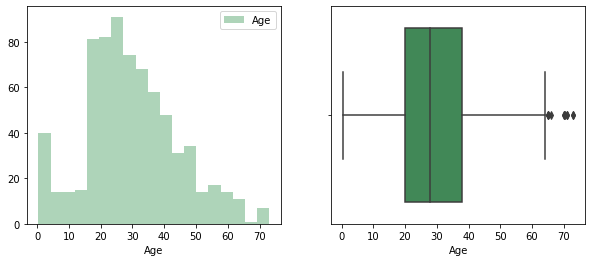

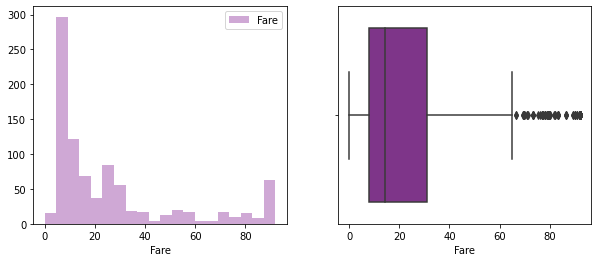

In [66]:
for i in df.columns:
    plt.figure(figsize = (10,4))
    val = np.random.randint(100000,999999)
    col = "#" + str(val)
    plt.subplot(1,2,1)
    sns.distplot(df[i], kde = False, color = col, label = i)
    plt.legend()
    plt.subplot(1,2,2)
    sns.boxplot(df[i], color = col)

    plt.show()

still having outlierss... uff!!!

First apply transformation

In [80]:
df = data.copy()

In [81]:
df = df[['Age', 'Fare']].dropna()

In [82]:
from scipy import stats
for i in df.columns:
    df[i + "_log"] = np.log(df[i]+1)
    df[i + "_exp"] = np.exp(df[i])
    df[i + "_sqrt"] = df[i] ** (1/2)
    df[i + "_rec"] = 1/(df[i])
    df[i + "_box"], param = stats.boxcox(df['Fare']+1)
    

In [83]:
df

,Age,Fare,Age_log,Age_exp,Age_sqrt,Age_rec,Age_box,Fare_log,Fare_exp,Fare_sqrt,Fare_rec,Fare_box
0,22.0,7.2500,3.135494,3.584913e+09,4.690416,0.045455,1.808693,2.110213,1.408105e+03,2.692582,0.137931,1.808693
1,38.0,71.2833,3.663562,3.185593e+16,6.164414,0.026316,3.158178,4.280593,9.077031e+30,8.442944,0.014029,3.158178
2,26.0,7.9250,3.295837,1.957296e+11,5.099020,0.038462,1.865651,2.188856,2.765564e+03,2.815138,0.126183,1.865651
3,35.0,53.1000,3.583519,1.586013e+15,5.916080,0.028571,3.002405,3.990834,1.150898e+23,7.286975,0.018832,3.002405
4,35.0,8.0500,3.583519,1.586013e+15,5.916080,0.028571,1.875654,2.202765,3.133795e+03,2.837252,0.124224,1.875654
...,...,...,...,...,...,...,...,...,...,...,...,...
885,39.0,29.1250,3.688879,8.659340e+16,6.244998,0.025641,2.666205,3.405355,4.454785e+12,5.396758,0.034335,2.666205
886,27.0,13.0000,3.332205,5.320482e+11,5.196152,0.037037,2.179080,2.639057,4.424134e+05,3.605551,0.076923,2.179080
887,19.0,30.0000,2.995732,1.784823e+08,4.358899,0.052632,2.683342,3.433987,1.068647e+13,5.477226,0.033333,2.683342
889,26.0,30.0000,3.295837,1.957296e+11,5.099020,0.038462,2.683342,3.433987,1.068647e+13,5.477226,0.033333,2.683342


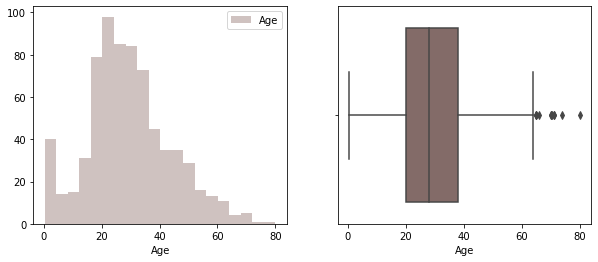

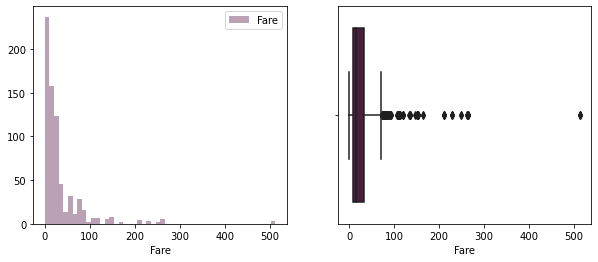

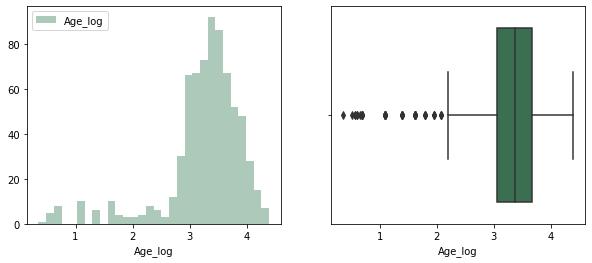

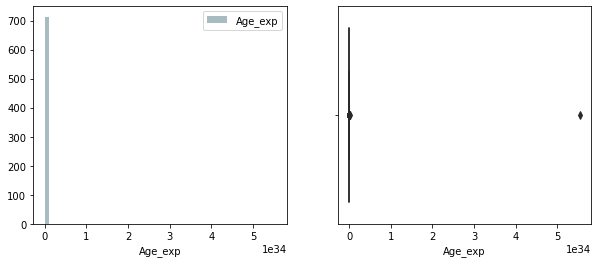

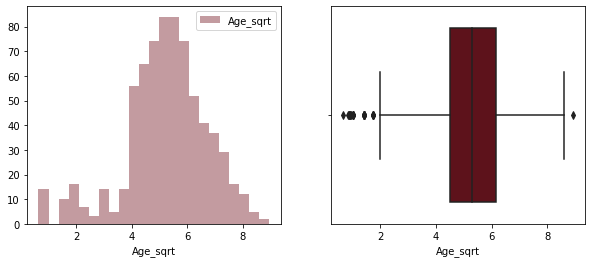

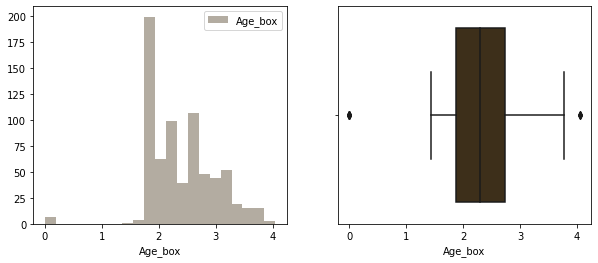

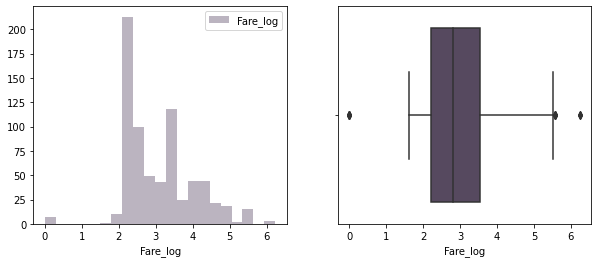

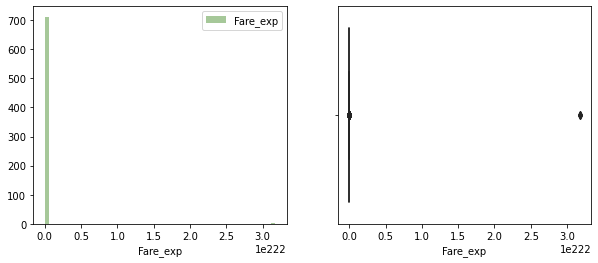

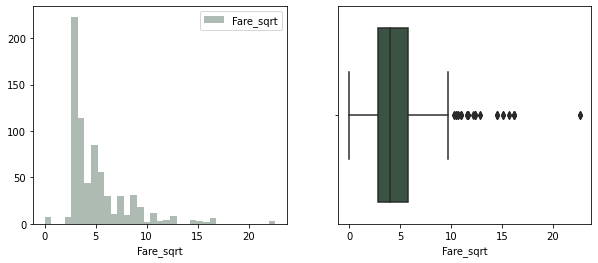

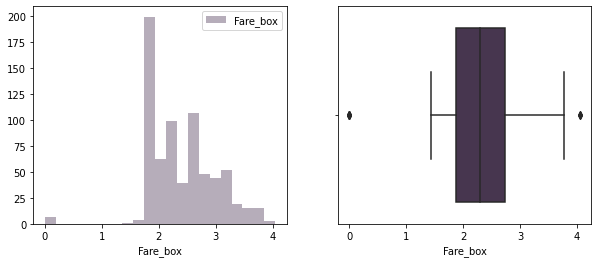

In [87]:
for i in df.columns:
    if "rec" in i.lower():
        continue
    plt.figure(figsize = (10,4))
    val = np.random.randint(100000,999999)
    col = "#" + str(val)
    plt.subplot(1,2,1)
    sns.distplot(df[i], kde = False, color = col, label = i)
    plt.legend()
    plt.subplot(1,2,2)
    sns.boxplot(df[i], color = col)

    plt.show()

### From Fare_log and Fare_box looks good.
Take that and find a range and remove outliers.
 
Its the method for finding the outliers and removing the outliers.